***
***


# Introduction to Gradient Descent

The Idea Behind Gradient Descent 梯度下降

***
***



<img src='./img/stats/gradient_descent.gif' align = "middle" width = '400px'>

<img align="left" style="padding-right:10px;" width ="400px" src="./img/stats/gradient2.png">


**如何找到最快下山的路？**
- 假设此时山上的浓雾很大，下山的路无法确定;
- 假设你摔不死！

    - 你只能利用自己周围的信息去找到下山的路径。
    - 以你当前的位置为基准，寻找这个位置最陡峭的方向，从这个方向向下走。


<img style="padding-right:10px;" width ="500px" src="./img/stats/gradient.png" align = 'right'>
**Gradient is the vector of partial derivatives**

One approach to maximizing a function is to
- pick a random starting point, 
- compute the gradient, 
- take a small step in the direction of the gradient, and 
- repeat with a new staring point.





<img src='./img/stats/gd.webp' width = '700' align = 'middle'>
Let's represent parameters as $\Theta$, learning rate as $\alpha$, and gradient as $\bigtriangledown J(\Theta)$, 

To the find the best model is an optimization problem
- “minimizes the error of the model” 
- “maximizes the likelihood of the data.” 

We’ll frequently need to maximize (or minimize)  functions. 
- to find the input vector v that produces the largest (or smallest) possible value.


# Mathematics behind Gradient Descent

A simple mathematical intuition behind one of the commonly used optimisation algorithms in Machine Learning.

https://www.douban.com/note/713353797/

The cost or loss function:

$$Cost = \frac{1}{N} \sum_{i = 1}^N (Y' -Y)^2$$



<img src='./img/stats/x2.webp' width = '700' align = 'center'>

Parameters with small changes:
$$ m_1 = m_0 - \delta m,  b_1 = b_0 - \delta b$$

The cost function J is a function of m and b:

$$J_{m, b} = \frac{1}{N} \sum_{i = 1}^N (Y' -Y)^2 = \frac{1}{N} \sum_{i = 1}^N Error_i^2$$

$$\frac{\partial J}{\partial m} = 2 Error \frac{\partial}{\partial m}Error$$

$$\frac{\partial J}{\partial b} = 2 Error \frac{\partial}{\partial b}Error$$

Let's fit the data with linear regression:

$$\frac{\partial}{\partial m}Error = \frac{\partial}{\partial m}(Y' - Y) = \frac{\partial}{\partial m}(mX + b - Y)$$

Since $X, b, Y$ are constant:

$$\frac{\partial}{\partial m}Error = X$$

$$\frac{\partial}{\partial b}Error = \frac{\partial}{\partial b}(Y' - Y) = \frac{\partial}{\partial b}(mX + b - Y)$$

Since $X, m, Y$ are constant:

$$\frac{\partial}{\partial m}Error = 1$$

Thus:
    
$$\frac{\partial J}{\partial m} = 2 * Error * X$$
$$\frac{\partial J}{\partial b} = 2 * Error$$

Let's get rid of the constant 2 and multiplying the learning rate  $\alpha$, who determines how large a step to take:

$$\frac{\partial J}{\partial m} = Error * X *  \alpha$$
$$\frac{\partial J}{\partial b} = Error * \alpha$$


Since $ m_1 = m_0 - \delta m,  b_1 = b_0 - \delta b$:

$$ m_1 = m_0 -  Error * X * \alpha$$

$$b_1 = b_0 - Error * \alpha$$

**Notice** that the slope b can be viewed as the beta value for X = 1. Thus, the above two equations are in essence the same.

Let's represent parameters as $\Theta$, learning rate as $\alpha$, and gradient as $\bigtriangledown J(\Theta)$, we have:


$$\Theta_1 = \Theta_0 - \alpha \bigtriangledown J(\Theta)$$




<img src='./img/stats/gd.webp' width = '800' align = 'center'>

Hence,to solve for the gradient, we iterate through our data points using our new $m$ and $b$ values and compute the partial derivatives. 

This new gradient tells us 
- the slope of our cost function at our current position  
- the direction we should move to update our parameters. 

- The size of our update is controlled by the learning rate.

In [17]:
import numpy as np

# Size of the points dataset.
m = 20
# Points x-coordinate and dummy value (x0, x1).
X0 = np.ones((m, 1))
X1 = np.arange(1, m+1).reshape(m, 1)
X = np.hstack((X0, X1))
# Points y-coordinate
y = np.array([3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
    11, 13, 13, 16, 17, 18, 17, 19, 21]).reshape(m, 1)

# The Learning Rate alpha.
alpha = 0.01

In [18]:
def error_function(theta, X, y):
    '''Error function J definition.'''
    diff = np.dot(X, theta) - y
    return (1./2*m) * np.dot(np.transpose(diff), diff)

def gradient_function(theta, X, y):
    '''Gradient of the function J definition.'''
    diff = np.dot(X, theta) - y
    return (1./m) * np.dot(np.transpose(X), diff)

def gradient_descent(X, y, alpha):
    '''Perform gradient descent.'''
    theta = np.array([1, 1]).reshape(2, 1)
    gradient = gradient_function(theta, X, y)
    while not np.all(np.absolute(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, y)
    return theta

# source：https://www.jianshu.com/p/c7e642877b0e

In [23]:
optimal = gradient_descent(X, y, alpha)
print('Optimal parameters Theta:', optimal[0][0], optimal[1][0])
print('Error function:', error_function(optimal, X, y)[0,0])


Optimal parameters Theta: 0.5158328581734093 0.9699216324486175
Error function: 405.98496249324046


# This is the End!

# Estimating the Gradient

If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x. 

> It is defined as the limit of the difference quotients:


差商（difference quotient）就是因变量的改变量与自变量的改变量两者相除的商。

In [2]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

For many functions it’s easy to exactly calculate derivatives. 

For example, the square function:

        def square(x): 
            return x * x

has the derivative:
    
        def derivative(x): 
            return 2 * x

In [3]:
def square(x):
    return x * x

def derivative(x):
    return 2 * x

derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

In [9]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

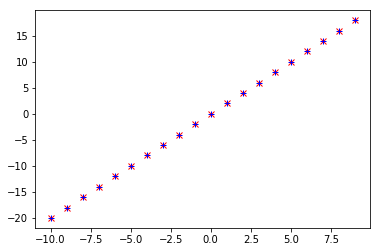

In [12]:
# plot to show they're basically the same
import matplotlib.pyplot as plt
x = range(-10,10)
plt.plot(x, list(map(derivative, x)), 'rx')           # red  x
plt.plot(x, list(map(derivative_estimate, x)), 'b+')  # blue +
plt.show()

When f is a function of many variables, it has multiple partial derivatives.

In [5]:
def partial_difference_quotient(f, v, i, h):
    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

# Using the Gradient

In [6]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

In [38]:
from collections import Counter
from linear_algebra import distance, vector_subtract, scalar_multiply
from functools import reduce
import math, random

In [42]:
print("using the gradient")

# generate 3 numbers 
v = [random.randint(-10,10) for i in range(3)]
print(v)
tolerance = 0.0000001

n = 0
while True:
    gradient = sum_of_squares_gradient(v)   # compute the gradient at v
    if n%50 ==0:
        print(v, sum_of_squares(v))
    next_v = step(v, gradient, -0.01)       # take a negative gradient step
    if distance(next_v, v) < tolerance:     # stop if we're converging
        break
    v = next_v                              # continue if we're not
    n += 1

print("minimum v", v)
print("minimum value", sum_of_squares(v))

using the gradient
[-4, 10, 6]
[-4, 10, 6] 152
[-1.4566787203484681, 3.641696800871171, 2.1850180805227026] 20.15817249600249
[-0.5304782235790126, 1.3261955589475318, 0.7957173353685193] 2.6733678840696777
[-0.19318408497395115, 0.482960212434878, 0.28977612746092685] 0.35454086152861664
[-0.07035178642288623, 0.17587946605721566, 0.10552767963432938] 0.04701905160246833
[-0.025619987555179666, 0.0640499688879492, 0.03842998133276951] 0.006235645742111834
[-0.0093300226718057, 0.023325056679514268, 0.013995034007708552] 0.0008269685690358806
[-0.0033977113715970304, 0.008494278428992584, 0.005096567057395551] 0.00010967220436445803
[-0.0012373434632228497, 0.003093358658057131, 0.0018560151948342769] 1.4544679036813049e-05
[-0.0004506029731597509, 0.0011265074328993788, 0.0006759044597396269] 1.9289088744938724e-06
[-0.00016409594058189027, 0.00041023985145472635, 0.00024614391087283554] 2.558110382968256e-07
[-5.975876618530154e-05, 0.00014939691546325416, 8.963814927795238e-05] 3.39

# Choosing the Right Step Size

Although the rationale for moving against the gradient is clear, 
- how far to move is not. 
    - Indeed, choosing the right step size is more of an art than a science.

Methods:
1. Using a fixed step size
1. Gradually shrinking the step size over time
1. At each step, choosing the step size that minimizes the value of the objective function

In [13]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

It is possible that certain step sizes will result in invalid inputs for our function. 

So we’ll need to create a “safe apply” function
- returns infinity for invalid inputs:
    - which should never be the minimum of anything

In [14]:
def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')  # this means "infinity" in Python
    return safe_f

# Putting It All Together

- **target_fn** that we want to minimize
- **gradient_fn**. 

For example, the target_fn could represent the errors in a model as a function of its parameters, 

To choose a starting value for the parameters `theta_0`. 

In [15]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # set theta to initial value
    target_fn = safe(target_fn)               # safe version of target_fn
    value = target_fn(theta)                  # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]

        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

In [16]:
# minimize_batch"
v = [random.randint(-10,10) for i in range(3)]
v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)
print("minimum v", v)
print("minimum value", sum_of_squares(v))

minimum v [0.0009304595970494407, -0.001196305196206424, -0.00026584559915698326]
minimum value 2.367575066803034e-06


Sometimes we’ll instead want to maximize a function, which we can do by minimizing its negative

In [19]:
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

Using the batch approach, each gradient step requires us to make a prediction and compute the gradient for the whole data set, which makes each step take a long time.

Error functions are additive
- The predictive error on the whole data set is simply the sum of the predictive errors for each data point.

When this is the case, we can instead apply a technique called **stochastic gradient descent** 
- which computes the gradient (and takes a step) for only one point at a time. 
- It cycles over our data repeatedly until it reaches a stopping point.

# Stochastic Gradient Descent

During each cycle, we’ll want to iterate through our data in a random order:

In [20]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

This approach avoids circling around near a minimum forever
- whenever we stop getting improvements we’ll decrease the step size and eventually quit.

In [25]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [26]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)


In [ ]:
print("using minimize_stochastic_batch")

x = list(range(101))
y = [3*x_i + random.randint(-10, 20) for x_i in x]
theta_0 = random.randint(-10,10) 
v = minimize_stochastic(sum_of_squares, sum_of_squares_gradient, x, y, theta_0)

print("minimum v", v)
print("minimum value", sum_of_squares(v))
    

Scikit-learn has a Stochastic Gradient Descent module  http://scikit-learn.org/stable/modules/sgd.html